In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

#np.set_printoptions(threshold=sys.maxsize)

#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y
# Task: create a function to convert time to milliseconds
belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available

mean 149.21615384615387
standard deviation 1.7643501242516313
Outliers_min 144.0
Outliers_max 154.0


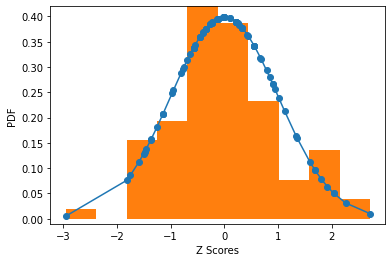

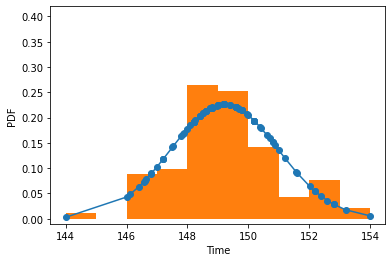

meand, std: 149.22101123595507 1.6186456017743405


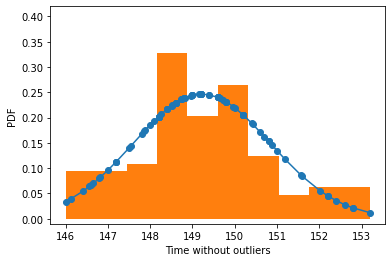

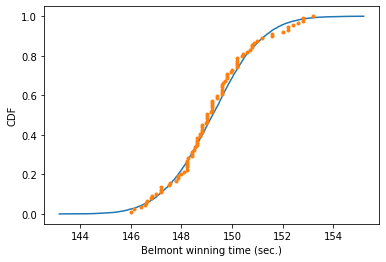

Probability of besting Secretariat: 0.000595


In [10]:
belmont

# find max value in the column
outlier_max_column = belmont["Time"]
outlier_max = outlier_max_column.max()
outlier_max

Year = belmont["Year"]

belmont["Miliseconds"] = belmont.Miliseconds.astype(float)
Time = belmont["Miliseconds"]
Time


#_ = plt.plot(Time, Year, '.')
#_ = plt.xlabel('belmont time in min')
#_ = plt.ylabel('Year')

mu_mean = np.mean(Time)
sigma_std = np.std(Time)
print('mean', mu_mean)
print('standard deviation', sigma_std)

# calculate Z-scores to find outliers
#Task: calc outliers using another methods see reccomandations

Z_scores = (Time - mu_mean)/sigma_std

Outliers_min = Z_scores.min()
# 1973 and 1970 years should be deleted from analysis

Outliers_max = Z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mu_mean)
print('Outliers_max', Outliers_max*sigma_std + mu_mean)

h_1 = sorted(Z_scores)  #sorted

fit = stats.norm.pdf(h_1, np.mean(h_1), np.std(h_1))  #this is a fitting indeed

pl.plot(h_1,fit,'-o')

pl.hist(h_1,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#Task 1: convert to array and print the whole array, combine two columns Time and Z-scores and Years and print as a table
#Task 2: delete outliers from the Time and print

#print(Time,Z_scores)

#  a normal distribution with outliers
h = sorted(Time)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#a normal distribution without outliers

Time_without = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146, 146.4, 148.2 , 149.8 , 147,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]
type(Time_without)
# Compute mean and standard deviation: mu, sigma
mu = np.mean(Time_without)
sigma = np.std(Time_without)

print('meand, std:', mu, sigma)

h = sorted(Time_without)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time without outliers')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(Time_without)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# to find out if it is possible to hit Secretariats record
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

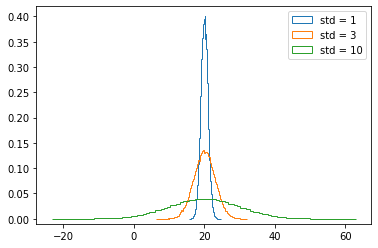

In [11]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

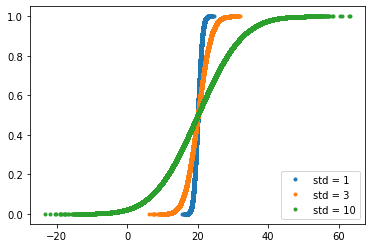

In [12]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


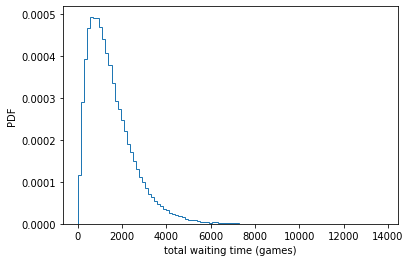

In [13]:
# exponential distribution

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

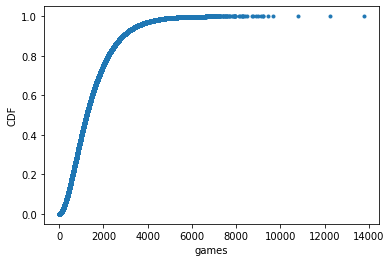

In [14]:
# Generate CDFs
x_std1, y_std1 = ecdf(waiting_times)
# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')

_ = plt.xlabel('games')
_ = plt.ylabel('CDF')
plt.show()

In [16]:
#no_hitters = pd.read_csv("no_hitters.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available
#no_hitters

In [ ]:

#nohitter_times
#number of days between no_hitters

no_hitters.date = pd.to_datetime(no_hitters.date,format='%Y%m%d')
no_hitters.winning_team = no_hitters.winning_team.astype('category')
no_hitters.losing_team = no_hitters.losing_team.astype('category')

d1 = no_hitters[['date']].reset_index()
d1['index'] = d1['index'] + 1

# drop last row
d1 = d1[:-1].set_index('index')

d1_m = no_hitters.merge(d1, how='left', left_index=True, right_index=True, suffixes=('_c','_b'))
d1_m['days_between'] = pd.Series(d1_m['date_c'] - d1_m['date_b'])
d1_m.days_between = d1_m.days_between.fillna(pd.Timedelta('0 days')).map(lambda s: s.days)

d1_m = d1_m.drop(columns=['date_b'])
d1_m = d1_m.rename(columns={'date_c':'date'}).set_index('date')

# overwrite
no_hitters = d1_m

d1_m.head()

nohitter_times = no_hitters.days_between
nohitter_times

date
1876-07-15       0
1880-06-12    1428
1880-06-17       5
1880-08-19      63
1880-08-20       1
              ... 
2015-07-25      35
2015-08-12      18
2015-08-21       9
2015-08-30       9
2015-10-03      34
Name: days_between, Length: 294, dtype: int64

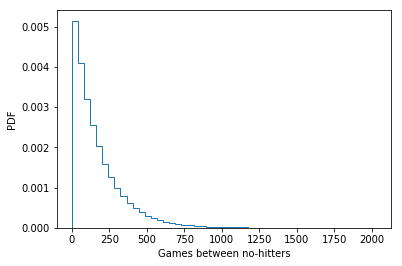

In [ ]:
# Seed random number generator
np.random.seed(42)
    
# Compute mean no-hitter time: tau
tau = nohitter_times.mean()

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
#plt.figure(figsize=(12,6))
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

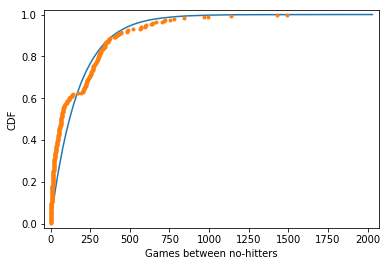

In [ ]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
#plt.figure(figsize=(12,6))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker= '.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

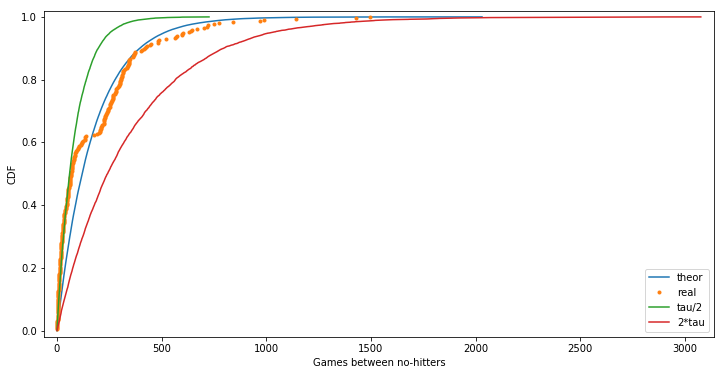

In [ ]:
# Plot the theoretical CDFs
plt.figure(figsize=(12,6))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')


# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Make a legend and show the plot
_ = plt.legend(('theor', 'real','tau/2','2*tau'), loc='lower right')

# Show the plot
plt.show()

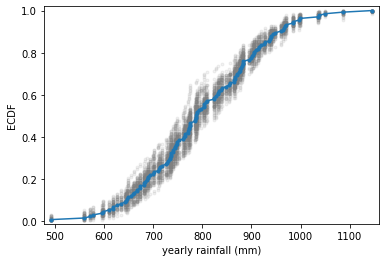

In [17]:
# bootstrap sampling
#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y
# Task: create a function to convert time to milliseconds
#weather = pd.read_csv("weather_station.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available
#weather
#rainfall = weather.rain
rainfall = [ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ]
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()



10.510549150506188
10.495449404328603


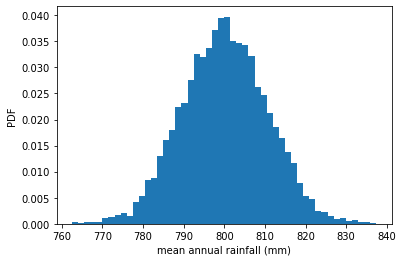

In [18]:
#generating many bootsrap replicates
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#Bootstrap replicates of the mean and the SEM ( standard error of the mean )

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
#Confidence intervals of rainfall data

np.percentile(bs_replicates, [2.5, 97.5])

array([779.96900376, 820.62793233])

/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


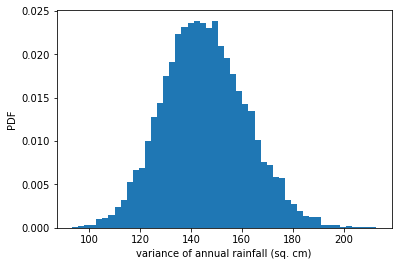

In [ ]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [148.1869898  198.81666667] games


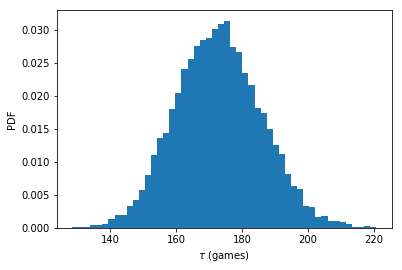

In [ ]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

[0.04417984 0.05587632]


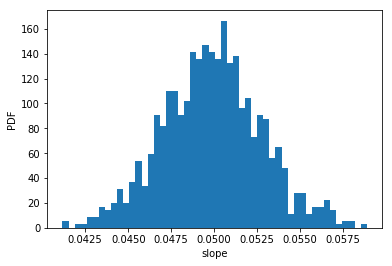

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

illiteracy = [ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
         6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
         1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
         0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
        10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
        32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
        81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
         1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
         2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
        11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
         8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
         0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
         4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
        14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
         3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9]



fertility = [1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
        1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
        1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
        1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
        6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
        3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
        4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
        2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
        6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
        3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
        3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
        3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
        1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
        5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
        2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
        2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
        1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
        2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928]



# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    np.array(illiteracy), np.array(fertility), size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()


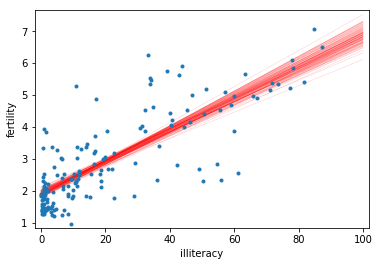

In [ ]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


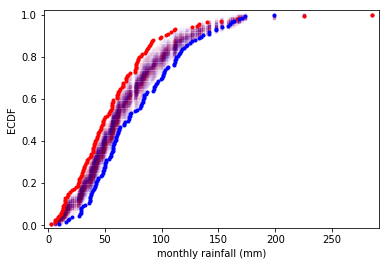

In [ ]:
rain_june = [ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]
rain_november = [ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8]

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')


# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [ ]:
illiteracy = [ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
         6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
         1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
         0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
        10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
        32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
        81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
         1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
         2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
        11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
         8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
         0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
         4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
        14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
         3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9]



fertility = [1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
        1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
        1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
        1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
        6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
        3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
        4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
        2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
        6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
        3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
        3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
        3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
        1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
        5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
        2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
        2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
        1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
        2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928]
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(illiteracy, fertility)

# Print the result
print(r)

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

0.8041324026815341
p-val = 0.0


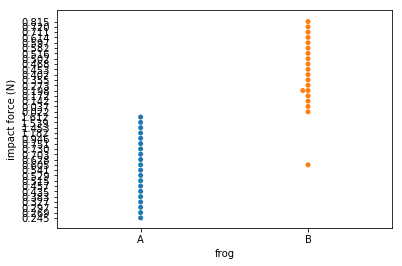

In [ ]:
import matplotlib.pyplot as plt
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

frogs = {'A': [1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515,0.435,0.383,0.457,0.730], 'B': [0.172,
0.142,
0.037,
0.453,
0.355,
0.022,
0.502,
0.273,
0.720,
0.582,
0.198,
0.198,
0.597,
0.516,
0.815,
0.402,
0.605,
0.711,
0.614,
0.468]}

df = pd.DataFrame(frogs, columns = ['A', 'B'])
#df_with_force = df.T

#Task create data frame for columnts: frog art and force!


frogs = pd.read_csv("frogs.csv", sep = ';', decimal= ",")

# Make bee swarm plot
_ = sns.swarmplot(x='frog', y='force', data=frogs)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Task: change ticker on the plot
# Show the plot
plt.show()




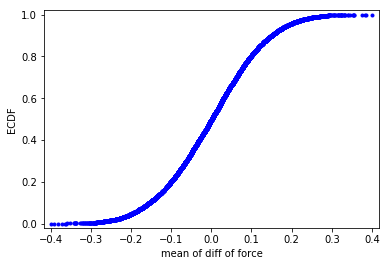

empirical_diff_means =  0.28825000000000006
p-value = 0.005


In [ ]:
force_a = frogs.loc[frogs['frog'] == 'A'].force.astype(np.float)
force_b = frogs.loc[frogs['frog'] == 'B'].force.astype(np.float)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(force_a)- np.mean(force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

x_2, y_2 = ecdf(perm_replicates)

_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')


# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('mean of diff of force')
_ = plt.ylabel('ECDF')
plt.show()

print('empirical_diff_means = ', empirical_diff_means)
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


In [ ]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0046


In [ ]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a, force_b), axis=None)
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0046


In [ ]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


In [ ]:
# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [ ]:
google = pd.read_csv('google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null object
Close    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [ ]:
google = pd.read_csv('google.csv')
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null datetime64[ns]
Close    756 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


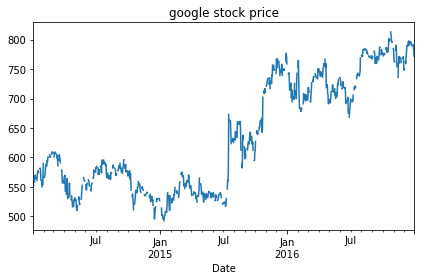

In [ ]:
google = pd.read_csv('google.csv')
google.Date = pd.to_datetime(google.Date)
#date into index, inplace means without creation of copy
google.set_index('Date', inplace = True)
google.info()
google.Close.plot(title = 'google stock price')
plt.tight_layout()
plt.show()

In [ ]:
google['2015'].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
#slice includes last monthes
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
#selecting specific stock price
google.loc['2016-6-1', 'Close']

734.15

In [ ]:
#set calender day freq
google.asfreq('D').info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
#highe freq implies new data --missing data or upsampling
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google.asfreq('B').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [ ]:
google[google.Close.isnull()]

,Close
Date,
2014-01-04,NaN
2014-01-05,NaN
2014-01-11,NaN
2014-01-12,NaN
2014-01-18,NaN
...,...
2016-12-17,NaN
2016-12-18,NaN
2016-12-24,NaN


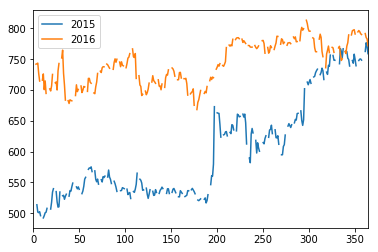

In [ ]:
#Compare annual stock price trends
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2015', '2016']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


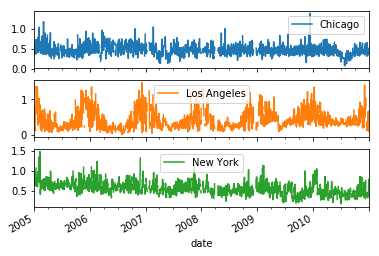

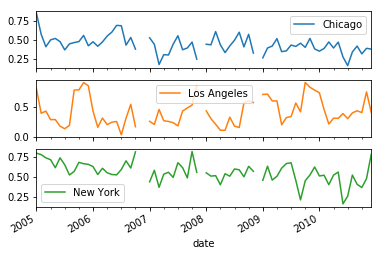

In [ ]:
#Task for self pace!!!!

cities = pd.read_csv('co_cities.csv')
cities.date = pd.to_datetime(cities.date)
#date into index, inplace means without creation of copy
cities.set_index('date', inplace = True)
cities.info()
# Inspect data
print(cities.info())

# Set data # set the frequency to calendar daily
cities = cities.asfreq('D')

# Plot the data
cities.plot(subplots=True)
plt.show()

# Set frequency to monthly
cities = cities.asfreq('M')

# Plot the 'close' price
cities.plot(subplots=True)
plt.show()

In [ ]:
#Lag, change and returns for stock prices
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col = 'Date')
google.info()
google['shifted'] = google.Close.shift() # by default it sets up period of 1
google.head(3)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95


In [ ]:
google['lagged'] = google.Close.shift(periods = -1)
google[['Close','shifted', 'lagged']].tail(3)

,Close,shifted,lagged
Date,,,
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [ ]:
#calculate one-period percent change
google['change'] = google.Close.div(google.shifted)
google[['Close','shifted', 'change']].tail(3)


,Close,shifted,change
Date,,,
2016-12-28,785.05,791.55,0.991788
2016-12-29,782.79,785.05,0.997121
2016-12-30,771.82,782.79,0.985986


In [ ]:
#return price
google['return'] = google.change.sub(1).mul(100)
google[['Close','shifted', 'lagged','return']].tail(3)

,Close,shifted,lagged,return
Date,,,,
2016-12-28,785.05,791.55,782.79,-0.821174
2016-12-29,782.79,785.05,771.82,-0.287880
2016-12-30,771.82,782.79,NaN,-1.401398


In [ ]:
google['diff'] = google.Close.diff()
google[['Close','diff']].tail(3)

,Close,diff
Date,,
2016-12-28,785.05,-6.50
2016-12-29,782.79,-2.26
2016-12-30,771.82,-10.97


In [ ]:
#build in function for return or time series % change
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close','return', 'pct_change']].tail(3)

,Close,return,pct_change
Date,,,
2016-12-28,785.05,-0.821174,-0.821174
2016-12-29,782.79,-0.287880,-0.287880
2016-12-30,771.82,-1.401398,-1.401398


In [ ]:
# return for 3 days
google['pct_change_3D'] = google.Close.pct_change(periods=3).mul(100)
google[['Close', 'pct_change']].head()

,Close,pct_change
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-0.728417
2014-01-04,NaN,0.000000
2014-01-05,NaN,0.000000
2014-01-06,558.10,1.114231


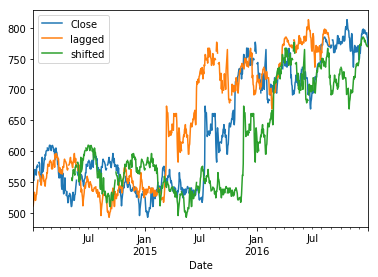

In [ ]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

In [ ]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


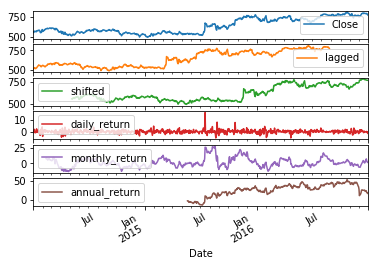

In [ ]:
# plotting multi-period returns
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


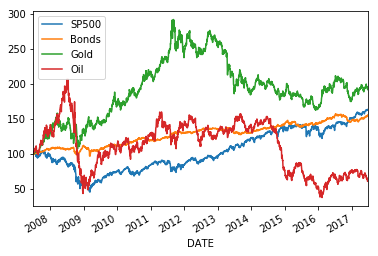

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80
...,...,...,...,...
2007-11-14,1470.58,422.04,808.25,94.02
2007-11-15,1451.15,424.60,806.00,93.37
2007-11-16,1458.74,424.58,790.25,94.81


In [ ]:
#compare time series growth rate
# Import data here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized_prices
normalized = prices.div(first_prices).mul(100)

# Plot normalized_prices
normalized.plot()
plt.show()

prices.head(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


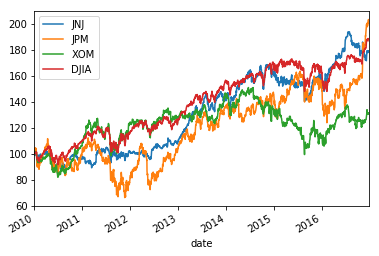

In [ ]:
# self pace Comparing stock prices with a benchmark

#comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies

# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

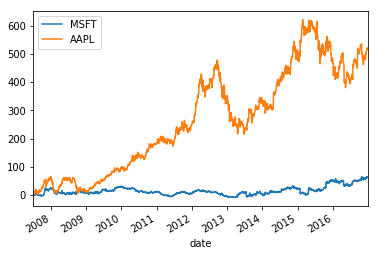

In [ ]:
#Plot performance difference vs benchmark index
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

In [ ]:
#Changing the time series frequency: resampling
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


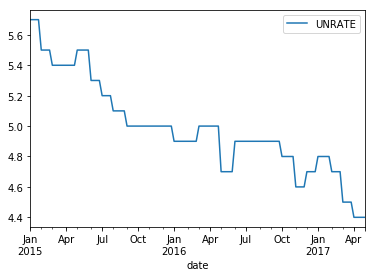

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [ ]:
#Create weekly from monthly unemployment data

# Import data here
data = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None


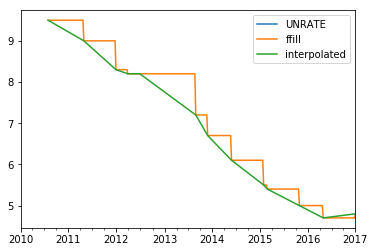

In [ ]:
#Upsampling & interpolation with .resample()
monthly = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


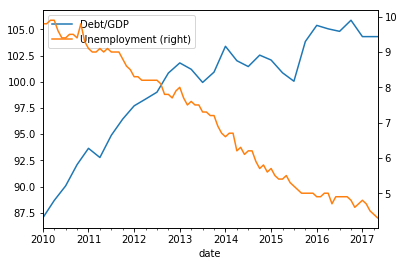

In [ ]:
#self pace 
# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB


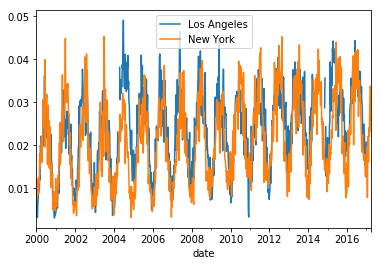

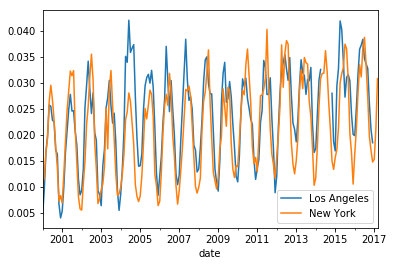

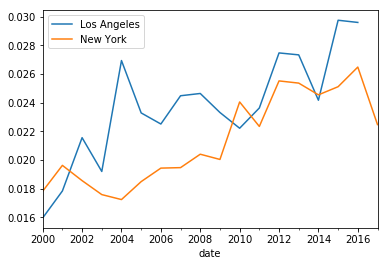

In [ ]:
#downsamling and aggregation

# Import and inspect data here
ozone = pd.read_csv('ozone_nyla.csv', parse_dates=['date'], index_col='date')
ozone.info();

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot();
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot();
plt.show();

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot();
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


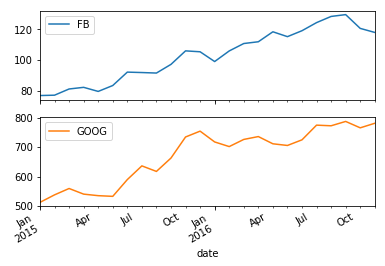

In [ ]:
#selfe pace
## Import and inspect data here
stocks = pd.read_csv('goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB


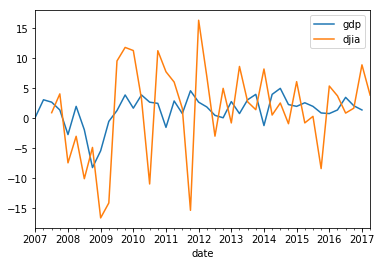

In [ ]:
#Compare quarterly GDP growth rate and stock returns
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
djia.info()

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show();
#Do you think there's a relationship between GDP and the Dow Jones?

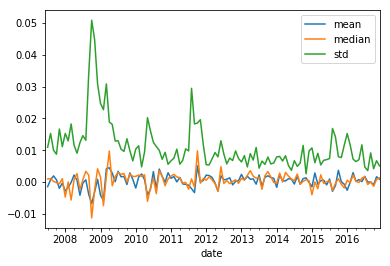

In [ ]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show();


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


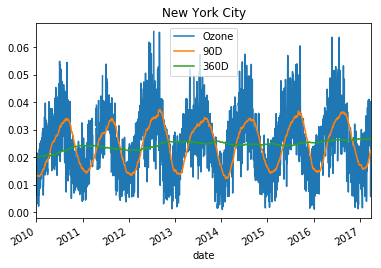

In [ ]:
#Rolling window functions with pandas
#Rolling average air quality since 2010
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

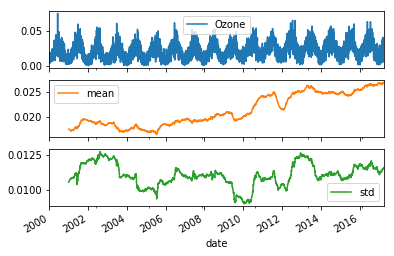

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);
plt.show()
#How does adding the standard deviation help you understand what's happening in the orignal series?

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB


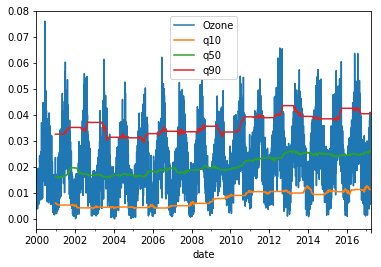

In [ ]:
#Rolling quantiles for daily air quality 
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()
#Note: The rolling quantiles help show the volatility of the series.

In [ ]:
#Expanding window functions with pandas
data_g = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
# Calculate differences
differences = data_g.diff().dropna()

# Select start price
start_price = data_g.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data_g.equals(cumulative_sum))
print(data_g.head())
print(differences)
print(start_price)
print(cumulative_sum)

False
             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10
            Close
Date             
2014-01-03  -4.05
2014-01-07  10.76
2014-01-08   1.18
2014-01-09  -5.49
2014-01-10  -0.03
...           ...
2016-12-22  -3.30
2016-12-23  -1.35
2016-12-28  -6.50
2016-12-29  -2.26
2016-12-30 -10.97

[594 rows x 1 columns]
            Close
Date             
2014-01-02  556.0
             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-07  562.71
2014-01-08  563.89
2014-01-09  558.40
...            ...
2016-12-22  740.39
2016-12-23  739.04
2016-12-28  732.54
2016-12-29  730.28
2016-12-30  719.31

[595 rows x 1 columns]


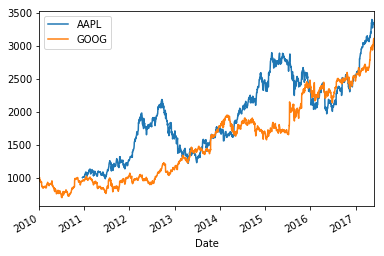

In [ ]:
#Cumulative return on $1,000 invested in google vs apple 
# Define your investment
investment = 1000
data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();

/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


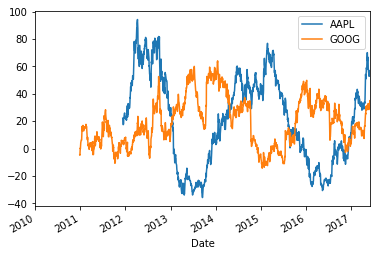

In [ ]:
#Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

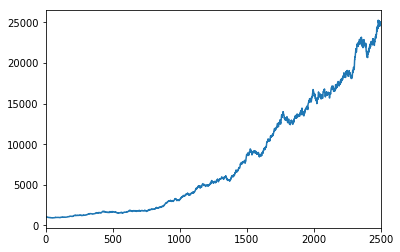

In [ ]:
#generate a random walk of returns, and how to convert this random return series into a random stock price path.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
# Set seed here

np.random.seed(42)

# Create random_walk
random_walk = np.random.normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2012-05-17 to 2017-05-31
Data columns (total 1 columns):
price    1267 non-null float64
dtypes: float64(1)
memory usage: 19.8 KB


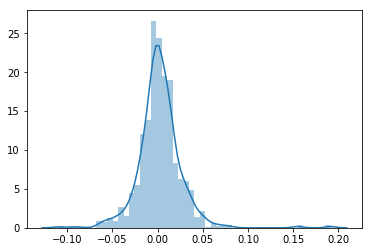

In [ ]:
#build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017
# Set seed here
np.random.seed(42)
header_list = ["date", "price"]
fb = pd.read_csv('fb.csv', names= header_list)
fb.date = pd.to_datetime(fb.date)
#date into index, inplace means without creation of copy
fb.set_index('date', inplace = True)
fb.info()

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna().squeeze()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = np.random.choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show();

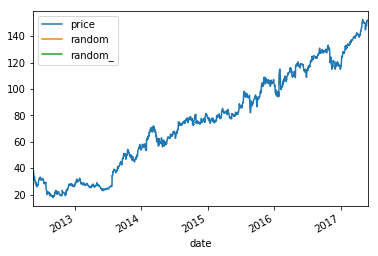

In [ ]:
# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()
#self pace to show random!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


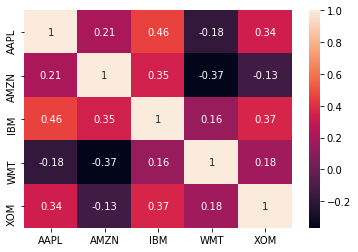

In [ ]:
data = pd.read_csv('5_stocks.csv', parse_dates=['Date'], index_col='Date')
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show();

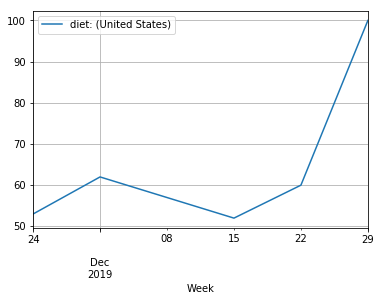

In [ ]:
#google trands
diet = pd.read_csv('diet.csv', parse_dates=['Week'], index_col='Week')
# From previous step
#diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2019 = diet['2019']

# Plot 2012 data
diet2019.plot(grid=True)
plt.show()

In [ ]:
# Import the statsmodels module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
#import statsmodels.api as sm
#from statsmodels import api as sm
import statsmodels.api as sm
# Compute correlation of x and y

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y,dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
MSFT = pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date')
# Convert the daily data to weekly data
#MSFT = MSFT.resample(rule='W', how='last')
MSFT = MSFT.resample(rule='W').last()
# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


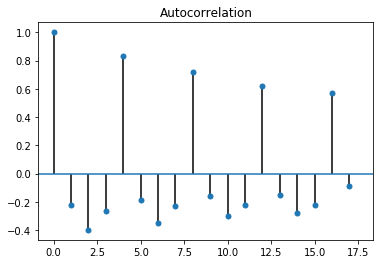

In [ ]:
#you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags.

HRB = pd.read_csv('HRB.csv', parse_dates=['Quarter'], index_col='Quarter')
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

The autocorrelation of weekly MSFT returns is 1.00
The approximate confidence interval is +/- 0.06


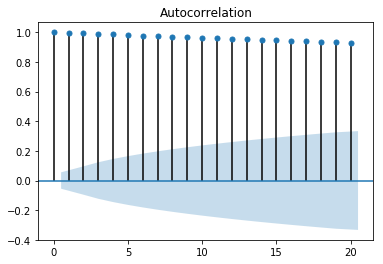

In [ ]:
#you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. 
#That autocorrelation seems large, but is it statistically significant? 
#In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation 
#if the true autocorrelation were really zero? 
#And are there any autocorrelations at other lags that are significantly different from zero?

# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
returns = pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date')
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()


The mean is 0.023 and the standard deviation is 0.050


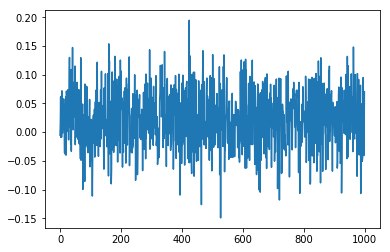

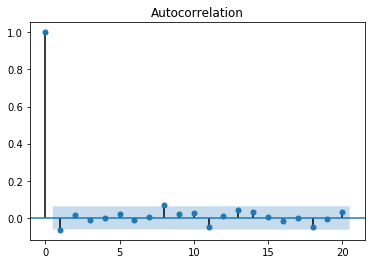

In [ ]:
#A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. 
#Stock returns are often modeled as white noise. 
#Unfortunately, for white noise, we cannot forecast future observations based on the past - 
#autocorrelations at all lags are zero.
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

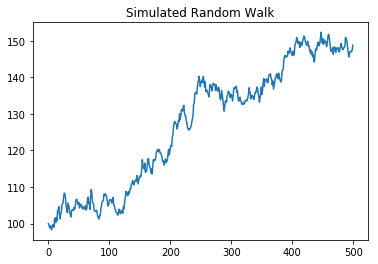

In [ ]:
#Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. 
#In other words, today's price is yesterday's price plus some random noise.
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1.0, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()


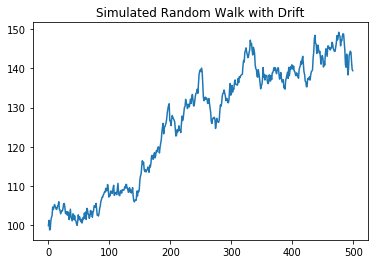

In [ ]:
#getting random walk with a drift
# Generate 500 random steps 
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()
#Note: This simulated price series you plotted should closely resemble a random walk for a high flying stock!!!!

In [ ]:
#Most stock prices follow a random walk (perhaps with a drift).
#With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. 
#Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.
# Import the adfuller module from statsmodels

from statsmodels.tsa.stattools import adfuller
AMZN = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.02516852577074, 1.0, 33, 5054, {'5%': -2.862112049726916, '10%': -2.5670745025321304, '1%': -3.4316445438146865}, 30308.64216426981)
The p-value of the test on prices is: 1.0


In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))
#Stock returns a random walk?
#The p-value is extremely small, 
#so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

The p-value of the test on returns is: 2.565589808348177e-22


            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


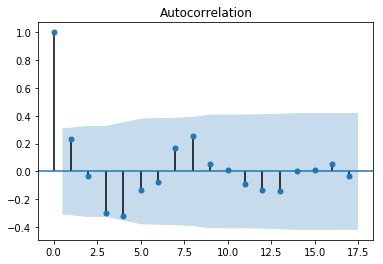

In [ ]:
#Seasonal Adjustment During Tax Season
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

#Note: By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function

/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


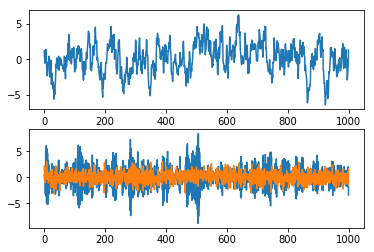

In [ ]:
#Simulate AR(1) Time Series

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.subplot(2,1,2)
ar3 = np.array([1, 0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

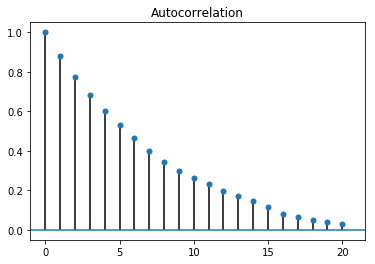

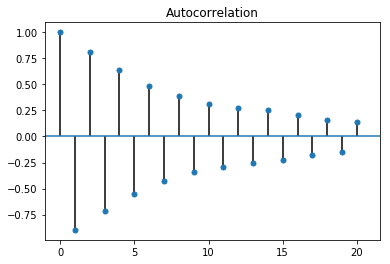

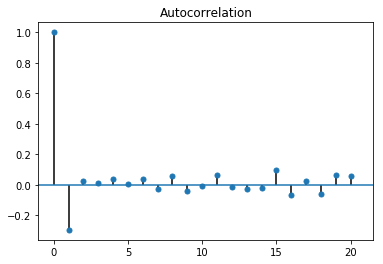

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()
#Note: The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.

In [ ]:
#Estimating an AR Model for AR parameter = +0.9
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1396.363
Method:                       css-mle   S.D. of innovations              0.977
Date:                Sun, 22 Nov 2020   AIC                           2798.727
Time:                        20:35:47   BIC                           2813.450
Sample:                             0   HQIC                          2804.323
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1341      0.255      0.525      0.600      -0.367       0.635
ar.L1.y        0.8799      0.015     58.918      0.000       0.851       0.909
                                    Roots           

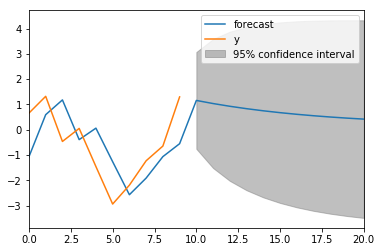

In [ ]:
# Exercise Forecasting with an AR Model
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()
#Note: Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, 
#but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!

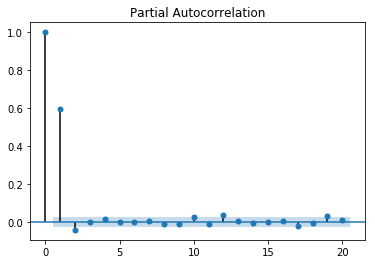

In [ ]:
#Estimate Order of Model: PACF
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

#Notice that the number of significant lags for the PACF indicate the order of the AR model!
#One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). 
#In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. 
#You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. 
#And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

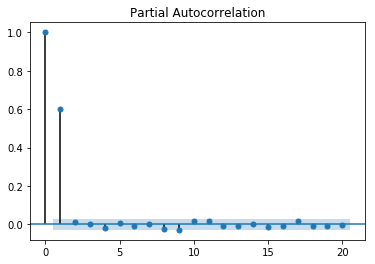

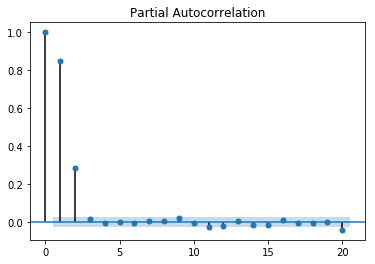

In [ ]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)


# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

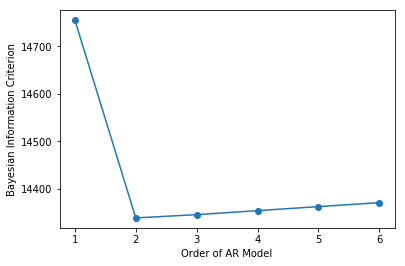

In [ ]:
#Estimate Order of Model: Information Criteria
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

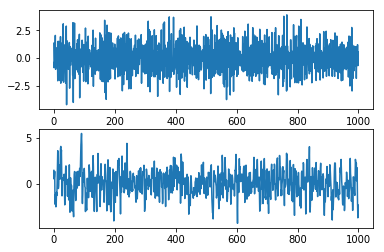

In [ ]:
#note For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.
#Simulate MA(1) Time Series
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)


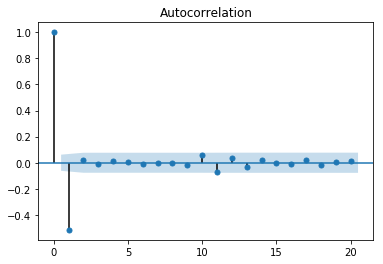

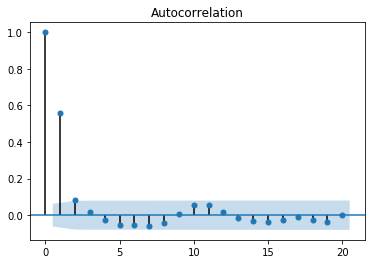

In [ ]:
#Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. 
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()
plot_acf(simulated_data_2, lags=20)
plt.show()

In [ ]:
#Estimation and Forecasting an MA Model
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.567
Method:                       css-mle   S.D. of innovations              1.004
Date:                Sun, 22 Nov 2020   AIC                           2853.134
Time:                        21:20:15   BIC                           2867.857
Sample:                             0   HQIC                          2858.730
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.003      1.381      0.167      -0.002       0.012
ma.L1.y       -0.8911      0.014    -62.703      0.000      -0.919      -0.863
                                    Roots           

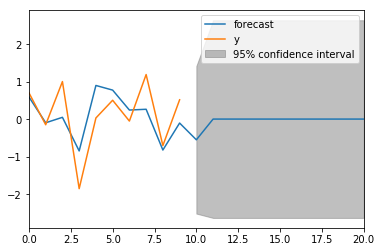

In [ ]:
#One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is
#that the MA(1) forecasts more than one period in the future are simply the mean of the sample.
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

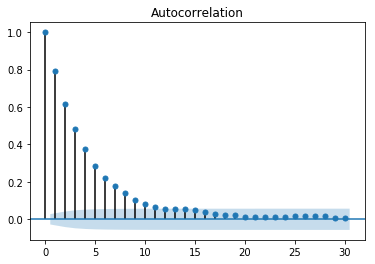

In [ ]:
#Equivalence of AR(1) and MA(infinity)
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

In [ ]:
basetable = pd.read_csv('basetable.csv', sep = ';', decimal= ",")
# Import linear_model from sklearn.
from sklearn import linear_model

# Create a dataframe X that only contains the candidate predictors age, gender_F and time_since_last_gift.
# Note: X contains the predictive variables, whereas y has the target.
X = basetable[['age','gender_F','time_since_last_gift']]

# Create a dataframe y that contains the target.
y = basetable[['target']].values.ravel()
#y = y(y, warn=True)
# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
#basetable.info()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Construct a logistic regression model that predicts the target using age, gender_F and time_since_last gift
predictors = ["age","gender_F","time_since_last_gift"]
X = basetable[predictors]
y = basetable[["target"]].values.ravel()
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(predictors,list(coef[0])):
    print(p + '\t' + str(c))

# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

age	0.007801469599041298
gender_F	0.10964341264659574
time_since_last_gift	-0.0012872607039948766
[-2.59072469]


In [ ]:
#Note: The coefficient of gender_F is positive, meaning that women are more likely to donate. :)
# now let us make predictions for each obsorvation
# Fit a logistic regression model
from sklearn import linear_model
X = basetable[["age","gender_F","time_since_last_gift"]]
y = basetable[["target"]].values.ravel()
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

# Create a dataframe new_data from current_data that has only the relevant predictors 
new_data = basetable[["age","gender_F","time_since_last_gift"]]

# Make a prediction for each observation in new_data and assign it to predictions
predictions = logreg.predict_proba(new_data)
print(predictions[0:5])

[[0.93439418 0.06560582]
 [0.94519285 0.05480715]
 [0.92097941 0.07902059]
 [0.95296422 0.04703578]
 [0.94672824 0.05327176]]


In [ ]:
#task: create a new  data frame for donor id and its target probability to donate more then 100 Euro
# Make predictions
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc, roc_auc_score
X = basetable[["age","gender_F","time_since_last_gift"]]
y = basetable[["target"]].values.ravel()
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
predictions = logreg.predict_proba(X)
predictions_target = predictions[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, predictions_target)
print(round(auc,2))

0.63


In [ ]:
#Note: Adding more variables and therefore more complexity to your logistic regression model does not automatically result in more accurate models
# Create appropriate dataframes
basetable['mean_gift'] = basetable['mean_gift'].astype(float)
X_1 = basetable[['mean_gift', 'income_low']]
X_2 = basetable[['mean_gift', 'income_low', 'gender_F', 'country_India', 'age']]
y = basetable[["target"]].values.ravel()
#y = column_or_1d(basetable[["target"]], warn=True)
# Create the logistic regression model
logreg = linear_model.LogisticRegression()

# Make predictions using the first set of variables and assign the AUC to auc_1
logreg.fit(X_1, y)
predictions_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(y, predictions_1)

# Make predictions using the second set of variables and assign the AUC to auc_2
logreg.fit(X_2, y)
predictions_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(y, predictions_2)

# Print auc_1 and auc_2
print(round(auc_1,2))
print(round(auc_2,2))

0.68
0.69


In [ ]:
#Selecting the next best variable
'''
def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target].values.ravel()
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)
auc = auc(['age', 'gender_F'], ['target'], basetable)
print(round(auc,2))

def next_best(current_variables, candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
       auc_v = auc(current_variables + [v], target, basetable)
       if auc_v >= best_auc:
           best_auc = auc_v
           best_variable = v
    return best_variable '''

def auc(variables, target, df):
    X = df[variables]
    Y = df[target].values.ravel()
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)

def next_best(current_variables, candidate_variables, target, df):
    best_auc = -1
    best_variable = None
    
    # Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, df)
        
        # Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
            
    return best_variable

#init
current_variables = ['age', 'gender_F']
candidate_variables = ['mean_gift', 'min_gift', 'max_gift']
target = ['target']
next_variable = next_best(current_variables, candidate_variables, target, basetable)
print(next_variable)
max_number_variables = 5
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0,number_iterations):
    next_var = next_best(current_variables, candidate_variables, target, basetable)
    current_variables = current_variables + [next_var]
    candidate_variables.remove(next_var)
print(current_variables)


# Find the candidate variables
candidate_variables = list(basetable.columns.values)
candidate_variables.remove("target")

# Initialize the current variables
current_variables = []

# The forward stepwise variable selection procedure
number_iterations = 5
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, ["target"], basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

max_gift
['age', 'gender_F', 'max_gift', 'mean_gift', 'min_gift']
Variable added in step 1 is max_gift.
Variable added in step 2 is number_gift.
Variable added in step 3 is time_since_last_gift.
Variable added in step 4 is mean_gift.


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Variable added in step 5 is age.
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age']


In [ ]:
#As you can see, min_gift is not added. Does this mean that it is a bad variable?
#It can happen that a good variable is not added because it is highly correlated with a variable that is already in the model. 
#You can test this calculating the correlation between these variables
'''import numpy as np
# Calculate the AUC of the model using min_gift only
auc_min_gift = auc(["min_gift"],["target"],basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(["income_high"],["target"],basetable)
print(round(auc_income_high,2))

# Calculate the correlation between min_gift and mean_gift
correlation = np.corrcoef(basetable["min_gift"], basetable["mean_gift"])[0,1]
print(round(correlation,2))'''

# Calculate the AUC of the model using time_since_first_gift only
auc_min_gift = auc(["time_since_first_gift"],["target"], basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(["income_high"],["target"], basetable)
print(round(auc_income_high,2))

# Calculate the correlation between time_since_first_gift and time_since_last_gift
correlation = np.corrcoef(basetable["time_since_first_gift"], basetable["time_since_last_gift"])[0,1]
print(round(correlation,2))
#Note: You can observe that min_gift has more predictive power than income_high, 
#but that it is highly correlated with mean_gift and therefore not included in the selected variables.

0.59
0.52
0.15


In [ ]:
# Load the partitioning module
from sklearn.model_selection import train_test_split
def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    y_train = train[target]
    y_test = test[target]
    logreg = linear_model.LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(y_train, predictions_train)
    auc_test = roc_auc_score(y_test, predictions_test)
    return(auc_train, auc_test)

# Create dataframes with variables and target
X = basetable.drop('target', 1)
y = basetable["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train["target"])/len(train), 2))
print(round(sum(test["target"])/len(test), 2))

0.05
0.05


In [ ]:
# Create dataframes with variables and target
def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target].values.ravel()
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)
X = basetable.drop('target', 1)
y = basetable["target"]

# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

 # Apply the auc_train_test function
#auc_train = auc(["age","gender_F"], ["target"], train)
#auc_test = auc(["age","gender_F"], ["target"], test)
auc_train, auc_test = auc_train_test(["age","gender_F"], ["target"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

0.54
0.54


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

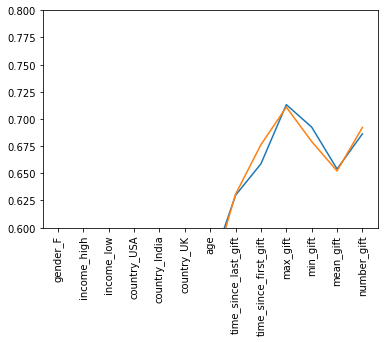

In [ ]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables = basetable.drop('target', 1)
# Add variables one by one
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:

    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    #auc_train = auc(variables_evaluate, ["target"], train)
    #auc_test = auc(variables_evaluate, ["target"], test)
    auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train, label = 'train')
plt.plot(x,y_test, label ='test')
plt.ylim((0.6, 0.8))
plt.show()


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


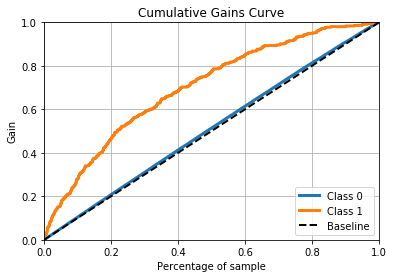

0    23813
1     1187
Name: target, dtype: int64

In [ ]:
#Note: Note that the test AUC curve starts declining sooner than the train curve. 
#The point at which this happens is a good cut-off.
#the test AUC does not increase after this point and it is better to have less complex models.
# Fit the model on the best variables
best_vars = ['gender_F', 'income_high', 'income_low', 'country_USA', 'country_India', 'country_UK', 'age', 'time_since_last_gift','time_since_first_gift', 'max_gift']
# Fit the model on the best variables
X_train = train[best_vars]
X_test = test[best_vars]
y_train = train["target"]
y_test = test["target"]

logreg = linear_model.LogisticRegression()
    
# Fit the model on train data
logreg.fit(X_train, y_train)
    
# Calculate the predictions on the test data
predictions_test = logreg.predict_proba(X_test)

# Import the scikitplot module
import scikitplot as skplt
#import scikit-learn 

#Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, predictions_test)

#ax = plt.gca()
#line = ax.lines[0]
#xd = line.get_xdata()
#yd = line.get_ydata()
plt.show()
basetable['target'].value_counts()

In [ ]:
# Create list of all original predictor variables
og_list = list(basetable.drop(['target', 'gender_F'], axis=1).columns.values)

# Loop through all original predictor variables to find the unincluded variables from the selection procedure
for i in og_list:
    if i not in current_variables:
        print(i)

In [ ]:
# Calculate the AUC of the model using time_since_first_gift only
auc_min_gift = auc(["time_since_first_gift"],["target"], basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(["income_high"],["target"], basetable)
print(round(auc_income_high,2))

# Calculate the correlation between time_since_first_gift and time_since_last_gift
correlation = np.corrcoef(basetable["time_since_first_gift"], basetable["time_since_last_gift"])[0,1]
print(round(correlation,2))

0.59
0.52
0.15


In [ ]:
#Note: You can observe that time_since_first_gift has more predictive power than income_high, 
#but that it is has some positive correlation with time_since_last_gift and therefore not included in the selected variables.

#Partisioning
def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    y_train = train[target].values.ravel()
    y_test = test[target].values.ravel()
    logreg = linear_model.LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(y_train, predictions_train)
    auc_test = roc_auc_score(y_test, predictions_test)
    return(auc_train, auc_test)
# Apply the auc_train_test function
auc_train, auc_test = auc_train_test(["age", "gender_F", 'number_gift'], ["target"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))


0.68
0.68


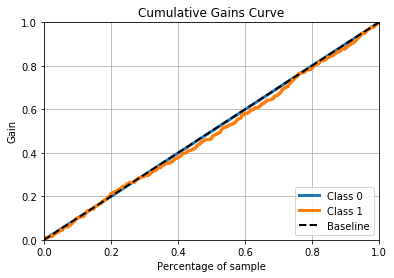

In [ ]:
# Import the modules
import random
import matplotlib.pyplot as plt
import scikitplot as skplt

# Generate random predictions
random_predictions = [random.uniform(0,1) for _ in range(len(y_test))]

# Adjust random_predictions
random_predictions = [(r,1-r) for r in random_predictions]

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, random_predictions)
plt.show()

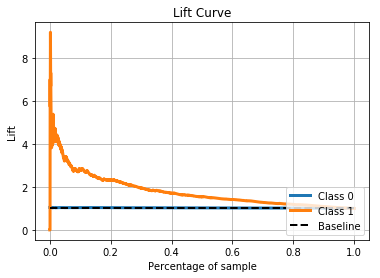

In [ ]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, predictions_test)
plt.show()

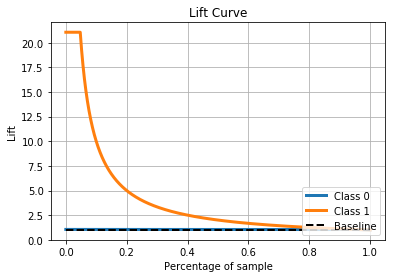

In [ ]:
# Generate perfect predictions
perfect_predictions = [(1-target,target) for target in y_test]

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, perfect_predictions)
plt.show()

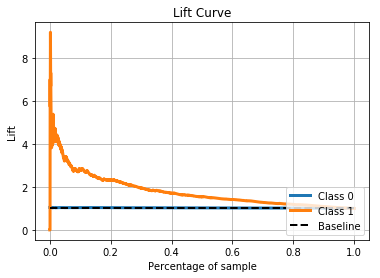

profit_all = 0.0
nprofit_40 = 20000.0
ndifference = 20000.0


In [ ]:
#Business case using lift curve
#perc_targets is the percentage of targets in the group that you select for your campaign
#perc_selected the percentage of people that is selected for the campaign
#population_size is the total population size
#campaign_cost is the cost of addressing a single person for the campaign
#campaign_reward is the reward of addressing a target

def profit(perc_targets, perc_selected, population_size, campaign_cost, campaign_reward):
    cost = perc_selected * population_size * campaign_cost
    reward = perc_targets * perc_selected * population_size * campaign_reward
    profit = (reward - cost)
    return profit

# Plot the lift graph
skplt.metrics.plot_lift_curve(y_test, predictions_test)
plt.show()

# Read the lift at 40% (round it up to the upper tenth)
perc_selected = 0.4
lift = 1.5

# Information about the campaign
population_size, target_incidence, campaign_cost, campaign_reward = 100000, 0.01, 1, 100
    
# Profit if all donors are targeted
profit_all = profit(target_incidence, 1, population_size, campaign_cost, campaign_reward)
print('profit_all =', round(profit_all, 2))

# Profit if top 40% of donors are targeted
profit_40 = profit(lift * target_incidence, 0.4, population_size, campaign_cost, campaign_reward)
print('nprofit_40 =', round(profit_40, 2))

diff = abs(profit_all - profit_40)
print('ndifference =', round(diff, 2))

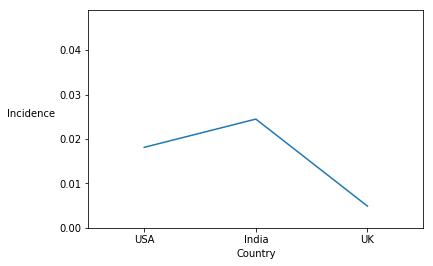

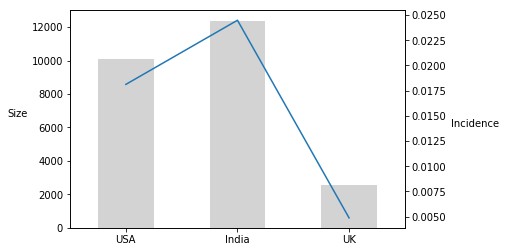

In [ ]:
#Retrieving information from the predictor insight table
locals = ['USA', 'India', 'UK']

cnt_usa = basetable[basetable.country_USA == 1].country_USA.value_counts().values[0]
cnt_ind = basetable[basetable.country_India == 1].country_India.value_counts().values[0]
cnt_uk = basetable[basetable.country_UK == 1].country_UK.value_counts().values[0]

inc_usa = basetable[(basetable.country_USA == 1) & (basetable.target == 1)].country_USA.value_counts().values[0] / len(basetable.index)
inc_ind = basetable[(basetable.country_India == 1) & (basetable.target == 1)].country_India.value_counts().values[0] / len(basetable.index)
inc_uk = basetable[(basetable.country_UK == 1) & (basetable.target == 1)].country_UK.value_counts().values[0] / len(basetable.index)

pig_table = pd.DataFrame(dict(Country = locals, Size = [cnt_usa, cnt_ind, cnt_uk], Incidence = [inc_usa, inc_ind, inc_uk]))
pig_table

# The function to plot a predictor insight graph.
def plot_incidence(pig_table, variable):
    
    # Plot the incidence line
    pig_table["Incidence"].plot()
    
    # Formatting the predictor insight graph
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylim([0, max(pig_table["Incidence"]*2)])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
    plt.xlabel(variable)
    
    # Show the graph
    plt.show()

plot_incidence(pig_table, "Country")

# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right")
    
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # Show the graph
    plt.show()
    
plot_pig(pig_table,"Country")


In [ ]:
#In order to make predictor insight graphs for continuous variables, you first need to discretize them.
# Discretize the variable time_since_last_donation in 10 bins
basetable1 = basetable.drop(['target',  'gender_F'], axis=1)
basetable1["bins_recency"] = pd.qcut(basetable1["time_since_last_gift"], 10)

# Print the group sizes
print(basetable1.groupby("bins_recency").size())

bins_recency
(31.999, 315.0]     2509
(315.0, 459.0]      2492
(459.0, 571.0]      2506
(571.0, 656.0]      2538
(656.0, 736.0]      2461
(736.0, 832.0]      2501
(832.0, 931.0]      2507
(931.0, 1047.0]     2499
(1047.0, 1211.0]    2498
(1211.0, 2305.0]    2489
dtype: int64


In [ ]:
# Print the columns in the original basetable
print(basetable1.columns)

# Get all the variable names except "target"
variables = list(basetable1.columns)
#variables.remove("target")

# Loop through all the variables and discretize in 10 bins if there are more than 5 different values
for variable in variables:
    if len(basetable1.groupby(variable))>5:
        new_variable = "disc_" + variable
        basetable1[new_variable] = pd.qcut(basetable1[variable], 10)
        
# Print the columns in the new basetable
print(basetable1.columns)

Index(['income_high', 'income_low', 'country_USA', 'country_India',
       'country_UK', 'age', 'time_since_last_gift', 'time_since_first_gift',
       'max_gift', 'min_gift', 'mean_gift', 'number_gift', 'bins_recency',
       'disc_age', 'disc_time_since_last_gift', 'disc_time_since_first_gift'],
      dtype='object')


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Select the income and target columns
basetable_income = basetable[["target","income_high"]]

# Group basetable_income by income
groups = basetable_income.groupby("income_high")

# Calculate the target incidence and print the result
incidence = groups["target"].agg({"Incidence" : np.mean}).reset_index()
print(incidence)

   income_high  Incidence
0            0   0.044993
1            1   0.060127


/home/irina_ternovikh/uniprojectdir/uniprojectenv/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [ ]:
# Function that creates predictor insight graph table
def create_pig_table(basetable, target, variable):

  	# Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    # Calculate size and target incidence for each group
    pig_table = groups[target].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()

    # Return the predictor insight graph table
    return pig_table

# Calculate the predictor insight graph table for the variable gender
pig_table_gender = create_pig_table(basetable, "target","gender_F")

# Print the result
print(pig_table_gender)

KeyError: "['gender_F'] not in index"

dict_keys(['DESCR', 'target_names', 'images', 'target', 'data'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

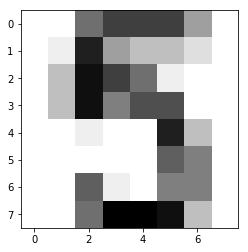

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


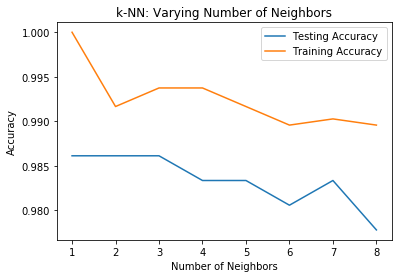

In [ ]:
#Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# It looks like the test accuracy is highest when using 3 and 5 neighbors. 
#Using 8 neighbors or more seems to result in a simple model that underfits the data.

######################################################
# Goal ist to predict life expectancy
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv', sep = ';', decimal= ",")
df.head(100)
# Create arrays for features and target variable

df['life'] = pd.to_numeric(df['life'], downcast="float")
df['fertility'] = pd.to_numeric(df['fertility'], downcast="float")
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


0.6192442440924553


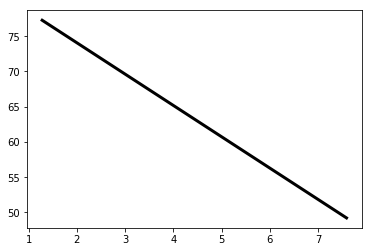

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298986660033916
Root Mean Squared Error: 4.194028854370117


In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001093 0.75007709 0.5527153  0.54750094 0.52410559]
Average 5-Fold CV Score: 0.6168819692998966


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))


0.6294716006297182
0.588393865110698


In [ ]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

df_columns = list(df.columns.values)



# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()